Sentiment Analysis Notebook:

Apply Vader sentiment analysis to UnderDog Devs Meeting notes.

Prepare dataframe with overall meeting sentiment scores in preparation for further analysis.

In [ ]:
import requests
import pandas as pd
import seaborn as sns

import nltk
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
! pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Examples of Vader sentiment analysis

In [ ]:
neg_example = sid.polarity_scores("This sucks so much!")
neg_example

{'compound': -0.4199, 'neg': 0.482, 'neu': 0.518, 'pos': 0.0}

In [ ]:
pos_example = sid.polarity_scores("This is really great and awesome!")['compound']
pos_example

0.8764

Pull meetings data

In [ ]:
df_meetings = pd.DataFrame(requests.post("http://underdog-devs-ds-a-dev.us-east-1.elasticbeanstalk.com/Meetings/read").json()["result"])

In [ ]:
print(df_meetings.head(), '\n'*2, 'Shape: ', df_meetings.shape)

         meeting_id           created_at           updated_at   meeting_topic  \
0  aE15d1P6gHP32Q14  2018-06-12T09:55:22  2018-06-12T09:55:22  Progress Check   
1  bzk5a16375MRX4H5  2018-06-12T09:55:22  2018-06-12T09:55:22      Job Search   
2  37bn6kvl7d1J1e42  2018-06-12T09:55:22  2018-06-12T09:55:22      Job Search   
3  h44V7Y6Og6737uiT  2018-06-12T09:55:22  2018-06-12T09:55:22        GCA Help   
4  zD3632TpVe4y3e44  2018-06-12T09:55:22  2018-06-12T09:55:22        GCA Help   

    meeting_start_date     meeting_end_date           host_id  \
0  2018-06-12T09:55:22  2018-06-12T09:55:22  MS8Z7Ktb4b3880s8   
1  2018-06-12T09:55:22  2018-06-12T09:55:22  605TF52AKz5mV0X1   
2  2018-06-12T09:55:22  2018-06-12T09:55:22  Mhp314z80m50nRH7   
3  2018-06-12T09:55:22  2018-06-12T09:55:22  3l57EW4381RQdXy2   
4  2018-06-12T09:55:22  2018-06-12T09:55:22  3i35zO52F2U1tBz4   

        attendee_id        meeting_notes meeting_missed  
0  7O1s01h1d0v5KyQ7  Meeting notes here!       Attended  
1  351

Update Meeting Note text

In [ ]:
df_meetings.loc[0:5, 'meeting_notes'] = 'This is a pile of crap. I hate it.'
df_meetings.loc[5:10, 'meeting_notes'] = 'This is amazing. I really love it.'
df_meetings.head(15)

,meeting_id,created_at,updated_at,meeting_topic,meeting_start_date,meeting_end_date,host_id,attendee_id,meeting_notes,meeting_missed
0,aE15d1P6gHP32Q14,2018-06-12T09:55:22,2018-06-12T09:55:22,Progress Check,2018-06-12T09:55:22,2018-06-12T09:55:22,MS8Z7Ktb4b3880s8,7O1s01h1d0v5KyQ7,This is a pile of crap. I hate it.,Attended
1,bzk5a16375MRX4H5,2018-06-12T09:55:22,2018-06-12T09:55:22,Job Search,2018-06-12T09:55:22,2018-06-12T09:55:22,605TF52AKz5mV0X1,351HEf841UH78ndH,This is a pile of crap. I hate it.,Attended
2,37bn6kvl7d1J1e42,2018-06-12T09:55:22,2018-06-12T09:55:22,Job Search,2018-06-12T09:55:22,2018-06-12T09:55:22,Mhp314z80m50nRH7,0W8zo5JfAG8T4008,This is a pile of crap. I hate it.,Attended
3,h44V7Y6Og6737uiT,2018-06-12T09:55:22,2018-06-12T09:55:22,GCA Help,2018-06-12T09:55:22,2018-06-12T09:55:22,3l57EW4381RQdXy2,37v3j3i4O8rDQ74A,This is a pile of crap. I hate it.,Missed
4,zD3632TpVe4y3e44,2018-06-12T09:55:22,2018-06-12T09:55:22,GCA Help,2018-06-12T09:55:22,2018-06-12T09:55:22,3i35zO52F2U1tBz4,M67T2HX1k18y16IJ,This is a pile of crap. I hate it.,Attended
5,7aK8407ue462nnMK,2018-06-12T09:55:22,2018-06-12T09:55:22,Job Search,2018-06-12T09:55:22,2018-06-12T09:55:22,3i35zO52F2U1tBz4,X6H5bF22r3h8RY76,This is amazing. I really love it.,Missed
6,hXV8h4TTm467g812,2018-06-12T09:55:22,2018-06-12T09:55:22,Resume Help,2018-06-12T09:55:22,2018-06-12T09:55:22,i7U0HRiXL313F118,401Qh1U8zel08Bo0,This is amazing. I really love it.,Missed
7,4ZM7iX76pC35L00L,2018-06-12T09:55:22,2018-06-12T09:55:22,Resume Help,2018-06-12T09:55:22,2018-06-12T09:55:22,o1452mYaYKH0K552,2cz84wif1102RZ2e,This is amazing. I really love it.,Attended
8,NJ232i6cSV6tD620,2018-06-12T09:55:22,2018-06-12T09:55:22,Progress Check,2018-06-12T09:55:22,2018-06-12T09:55:22,Mhp314z80m50nRH7,43hh2XF5Bd6eV885,This is amazing. I really love it.,Missed
9,02I1k0f8j2LpRi40,2018-06-12T09:55:22,2018-06-12T09:55:22,Job Search,2018-06-12T09:55:22,2018-06-12T09:55:22,5lzKJ3r5MY3477b5,351HEf841UH78ndH,This is amazing. I really love it.,Missed


Calculate Score for each meeting, append as new "sentiment" column in DataFrame:

In [ ]:
df_meetings['sentiment'] = \
  df_meetings['meeting_notes'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
df_meetings.head(15)

,meeting_id,created_at,updated_at,meeting_topic,meeting_start_date,meeting_end_date,host_id,attendee_id,meeting_notes,meeting_missed,sentiment
0,aE15d1P6gHP32Q14,2018-06-12T09:55:22,2018-06-12T09:55:22,Progress Check,2018-06-12T09:55:22,2018-06-12T09:55:22,MS8Z7Ktb4b3880s8,7O1s01h1d0v5KyQ7,This is a pile of crap. I hate it.,Attended,-0.7430
1,bzk5a16375MRX4H5,2018-06-12T09:55:22,2018-06-12T09:55:22,Job Search,2018-06-12T09:55:22,2018-06-12T09:55:22,605TF52AKz5mV0X1,351HEf841UH78ndH,This is a pile of crap. I hate it.,Attended,-0.7430
2,37bn6kvl7d1J1e42,2018-06-12T09:55:22,2018-06-12T09:55:22,Job Search,2018-06-12T09:55:22,2018-06-12T09:55:22,Mhp314z80m50nRH7,0W8zo5JfAG8T4008,This is a pile of crap. I hate it.,Attended,-0.7430
3,h44V7Y6Og6737uiT,2018-06-12T09:55:22,2018-06-12T09:55:22,GCA Help,2018-06-12T09:55:22,2018-06-12T09:55:22,3l57EW4381RQdXy2,37v3j3i4O8rDQ74A,This is a pile of crap. I hate it.,Missed,-0.7430
4,zD3632TpVe4y3e44,2018-06-12T09:55:22,2018-06-12T09:55:22,GCA Help,2018-06-12T09:55:22,2018-06-12T09:55:22,3i35zO52F2U1tBz4,M67T2HX1k18y16IJ,This is a pile of crap. I hate it.,Attended,-0.7430
5,7aK8407ue462nnMK,2018-06-12T09:55:22,2018-06-12T09:55:22,Job Search,2018-06-12T09:55:22,2018-06-12T09:55:22,3i35zO52F2U1tBz4,X6H5bF22r3h8RY76,This is amazing. I really love it.,Missed,0.8516
6,hXV8h4TTm467g812,2018-06-12T09:55:22,2018-06-12T09:55:22,Resume Help,2018-06-12T09:55:22,2018-06-12T09:55:22,i7U0HRiXL313F118,401Qh1U8zel08Bo0,This is amazing. I really love it.,Missed,0.8516
7,4ZM7iX76pC35L00L,2018-06-12T09:55:22,2018-06-12T09:55:22,Resume Help,2018-06-12T09:55:22,2018-06-12T09:55:22,o1452mYaYKH0K552,2cz84wif1102RZ2e,This is amazing. I really love it.,Attended,0.8516
8,NJ232i6cSV6tD620,2018-06-12T09:55:22,2018-06-12T09:55:22,Progress Check,2018-06-12T09:55:22,2018-06-12T09:55:22,Mhp314z80m50nRH7,43hh2XF5Bd6eV885,This is amazing. I really love it.,Missed,0.8516
9,02I1k0f8j2LpRi40,2018-06-12T09:55:22,2018-06-12T09:55:22,Job Search,2018-06-12T09:55:22,2018-06-12T09:55:22,5lzKJ3r5MY3477b5,351HEf841UH78ndH,This is amazing. I really love it.,Missed,0.8516


In [ ]:
overwhelmingly_negative = []
overwhelmingly_positive = []
for i in df_meetings['sentiment']:
  if i > 0.8:
    overwhelmingly_positive.append(i)
  elif i < -0.8:
    overwhelmingly_negative.append(i)
  else:
    pass

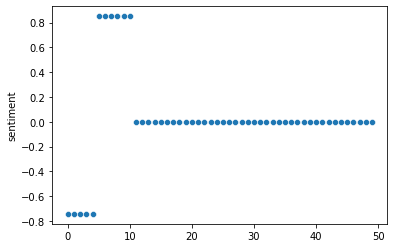

In [ ]:
sns.scatterplot(data=df_meetings['sentiment'])